Clustering approach on mental health with remote work.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns




In [8]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\Impact_of_Remote_Work_on_Mental_Health_cleaned.csv')

In [9]:
data.columns

Index(['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

Non-numeric columns: ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']


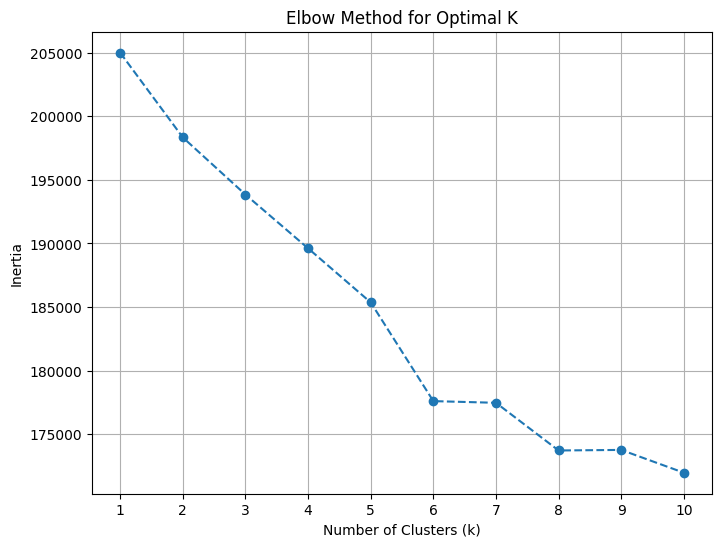

In [10]:

# Step 1: Loop through the columns and check which ones are non-numeric
non_numerical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
print("Non-numeric columns:", non_numerical_cols)

# Step 2: Use ColumnTransformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), non_numerical_cols),  # One-hot encode categorical columns
    ], remainder='passthrough'  # Leave the rest of the columns unchanged
)

# Step 3: Create a pipeline that applies scaling and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessor (One-Hot Encoding)
    ('scaler', StandardScaler()),    # Scale the data
])

# Step 4: Apply transformations to the data
data_transformed = pipeline.fit_transform(data)

# Step 5: Calculate inertia for different values of k
inertia = []
k_range = range(1, 11)  # You can try more values for k (e.g., 1 to 10 clusters)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_transformed)
    inertia.append(kmeans.inertia_)

# Step 6: Plot inertia vs. number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()



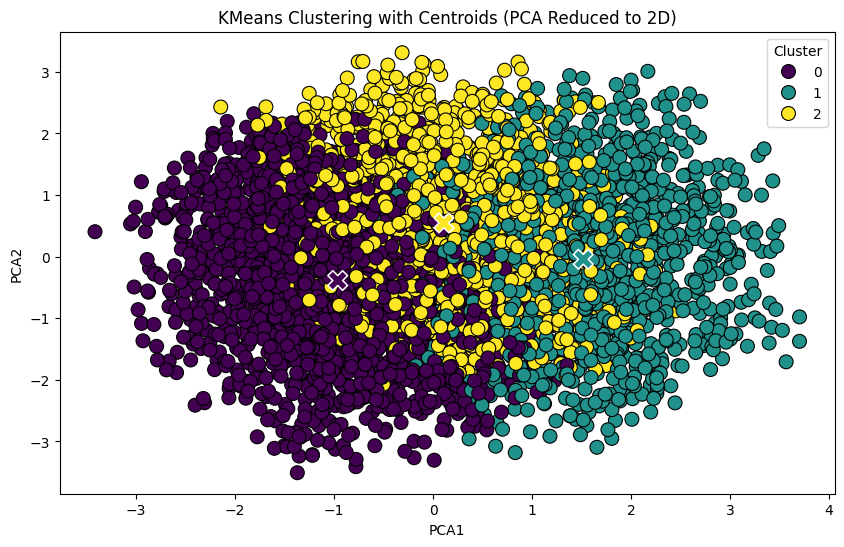

In [19]:

# Step 1: Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_transformed)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Step 2: Apply PCA for 2D visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_transformed)

# Create a DataFrame for easier plotting
df_pca = pd.DataFrame(data_2d, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Step 3: Transform centroids to PCA space
centroids_pca = pca.transform(centroids)  # Transform centroids into the PCA space

# Step 4: Create a DataFrame for the centroids in PCA space
centroids_df = pd.DataFrame(centroids_pca, columns=['PCA1', 'PCA2'])
centroids_df['Cluster'] = range(kmeans.n_clusters)  # Cluster labels for centroids

# Step 5: Plot the clusters and the centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='black')

# Plot the centroids in PCA space
sns.scatterplot(data=centroids_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', marker='X', s=200, legend=False)

plt.title('KMeans Clustering with Centroids (PCA Reduced to 2D)')
plt.show()



In [ ]:
features_to_reverse_encode = ['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Access_to_Mental_Health_Resources', 'Productivity_Change', 'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality', 'Region']

features_ready = inverse_transform(data_transformed, features_to_reverse_encode, preprocessor)


ValueError: Shape of the passed X data is not correct. Expected 34 columns, got 12.